In [6]:
import cv2
import numpy as np
import wget
import matplotlib.pyplot as plt

In [7]:
#url ="https://raw.githubusercontent.com/misbah4064/lane_detection/master/test1.mp4"
#wget.download(url)

In [17]:
def canny(img):
    grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

In [18]:
def region_of_interest(canny_img):
    height = canny_img.shape[0]
    width  = canny_img.shape[1]
    mask = np.zeros_like(canny_img)
    triangle = np.array([[(200,height),(800,350),(1100,height)]],np.int32)
    makes = cv2.fillPoly(mask,triangle,255)
    plt.imshow(makes)
    plt.show()
    masked_img = cv2.bitwise_and(canny_img,mask)
    return masked_img

In [19]:
def houghLines(img):
    houghLine = cv2.HoughLinesP(img,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    return houghLine

In [20]:
def displayLines(img,lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(img,(x1,y1),(x2,y2),(255,0,0),5)
    return img

In [21]:
def display_lines_average(img,lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img,(x1,y1),(x2,y2),(0,0,255),5)
    return img

In [22]:
def make_points(img,lineSI):
    slope,intercept = lineSI
    height = img.shape[0]
    y1 = int(height)
    y2 = int(y1*3.0/5)
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    print(x1,y1,x2,y2)
    return [[x1,y1,x2,y2]]


In [23]:
def avg_slope_int(img,lines):
    left_fit_line = []
    right_fit_line = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2),(y1,y2),1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0:
                left_fit_line.append((slope,intercept))
            else:
                right_fit_line.append((slope,intercept))
    left_fit_avg = np.average(left_fit_line,axis=0)
    right_fit_avg = np.average(right_fit_line,axis=0)
    left_line = make_points(img,left_fit_avg)
    right_line = make_points(img,right_fit_avg)
    average_lines = [left_line,right_line]
    return average_lines

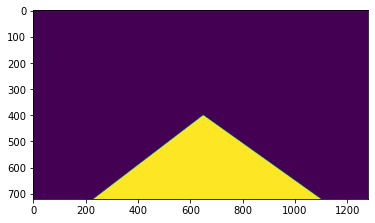

141 720 1086 432
1140 720 534 432


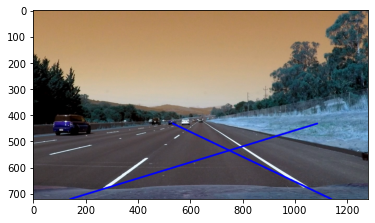

-1

In [24]:
imgframe = cv2.imread("straight_lines2.jpg")
canny_op = canny(imgframe)
masked_img = region_of_interest(canny_op)
hough_L = houghLines(masked_img)
avg_Lines = avg_slope_int(imgframe,hough_L)
line_img =display_lines_average(imgframe,avg_Lines)
plt.imshow(line_img)
plt.show()
cv2.imshow("result",line_img)
cv2.waitKey(0)

# Video test for LaneDetection

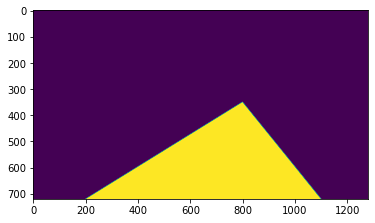

312 720 710 432
1080 720 780 432


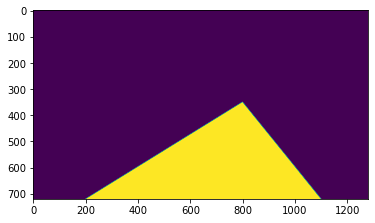

328 720 711 432
1067 720 776 432


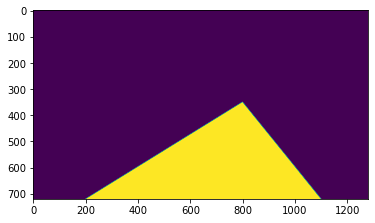

328 720 710 432
1064 720 777 432


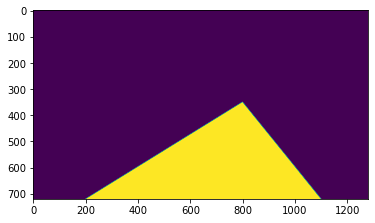

325 720 709 432
1073 720 774 432


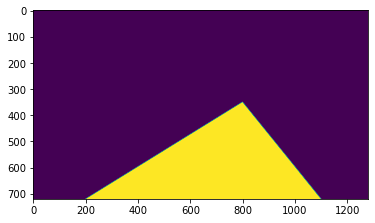

327 720 707 432
1063 720 779 432


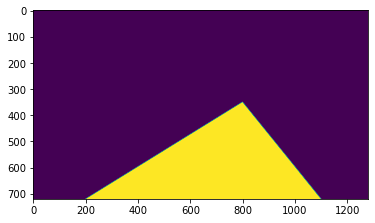

338 720 709 432
1068 720 776 432


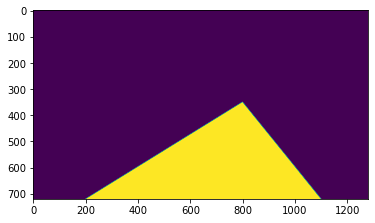

335 720 710 432
1051 720 780 432


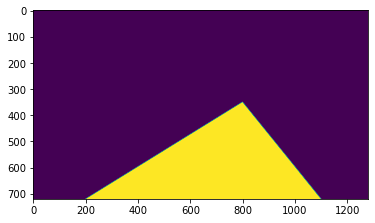

318 720 711 432
1067 720 776 432


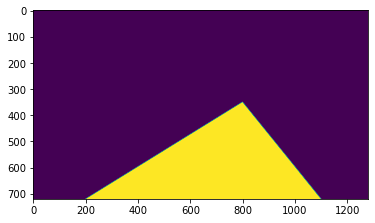

327 720 708 432
1070 720 780 432


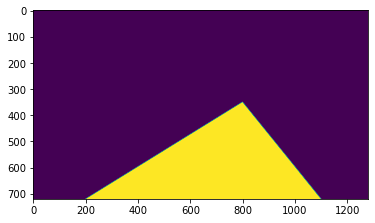

317 720 705 432
1068 720 774 432


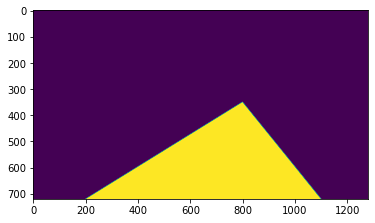

325 720 700 432
1058 720 767 432


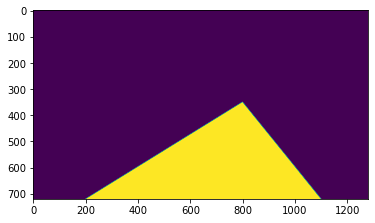

328 720 702 432
1066 720 765 432


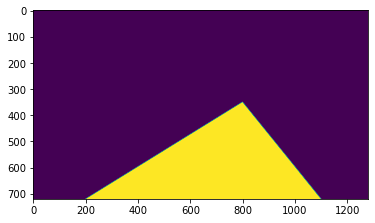

322 720 699 432
1060 720 763 432


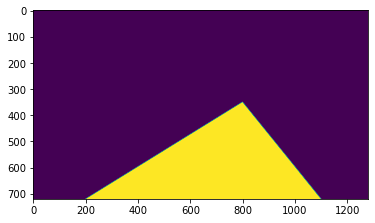

326 720 698 432
1049 720 766 432


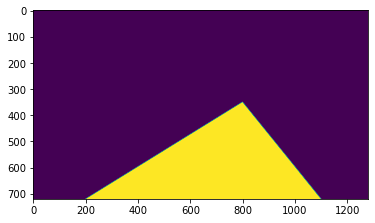

336 720 695 432
1036 720 750 432


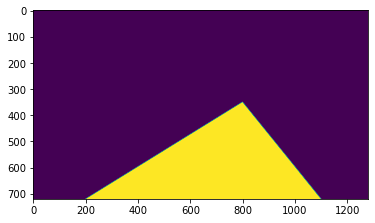

335 720 694 432
1019 720 748 432


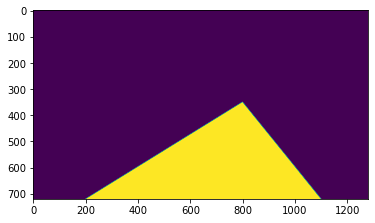

327 720 693 432
1024 720 745 432


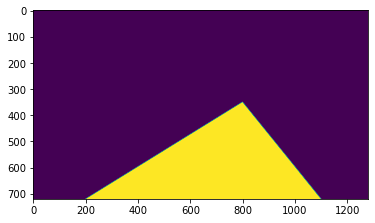

327 720 693 432
1027 720 753 432


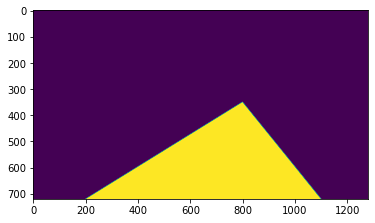

345 720 697 432
1018 720 749 432


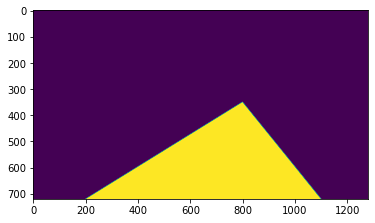

342 720 700 432
1036 720 765 432


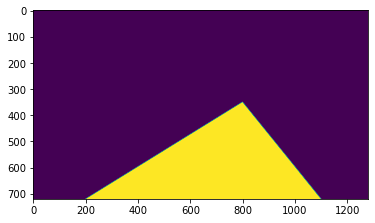

351 720 705 432
1044 720 775 432


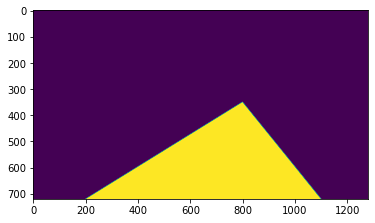

329 720 701 432
1030 720 767 432


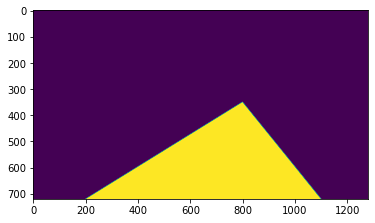

343 720 703 432
1032 720 770 432


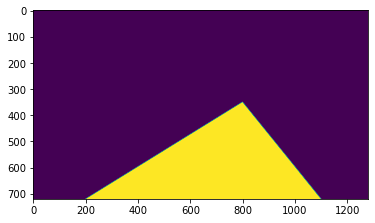

347 720 700 432
1036 720 770 432


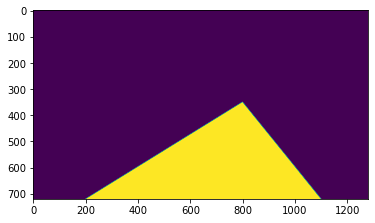

346 720 697 432
1016 720 760 432


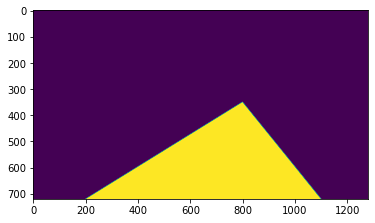

351 720 698 432
999 720 757 432


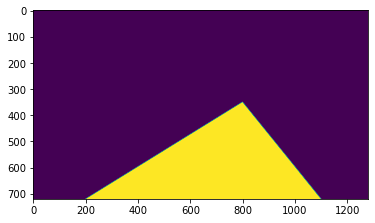

344 720 699 432
1026 720 767 432


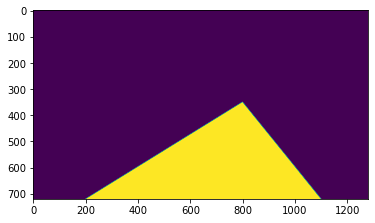

354 720 702 432
1056 720 779 432


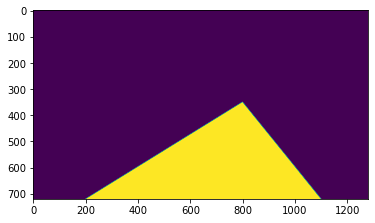

353 720 703 432
1038 720 775 432


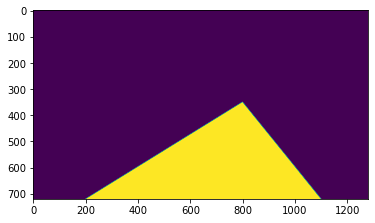

363 720 702 432
1038 720 779 432


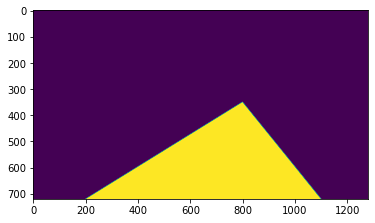

360 720 705 432
1071 720 787 432


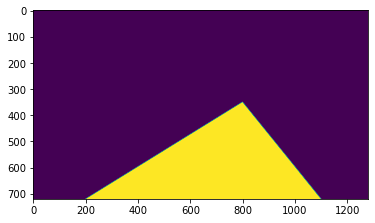

353 720 704 432
1014 720 769 432


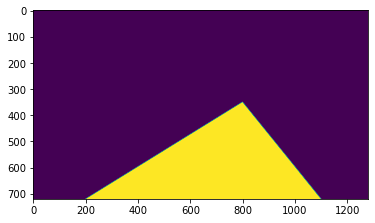

356 720 703 432
1000 720 763 432


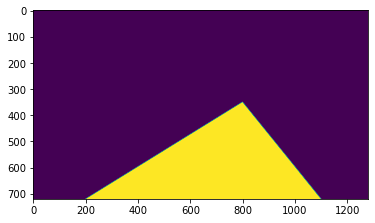

350 720 704 432
1004 720 766 432


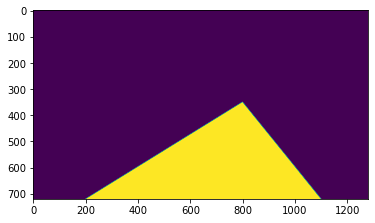

363 720 701 432
1020 720 766 432


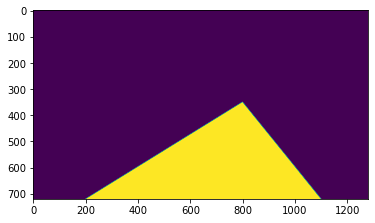

365 720 705 432
1002 720 766 432


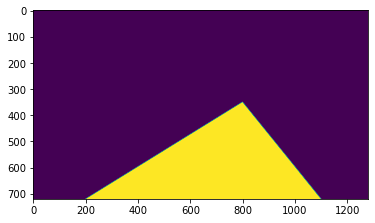

365 720 704 432
978 720 758 432


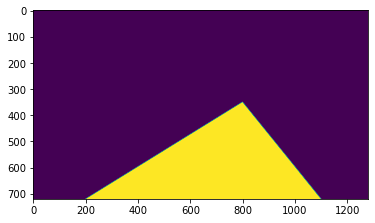

369 720 705 432
1107 720 785 432


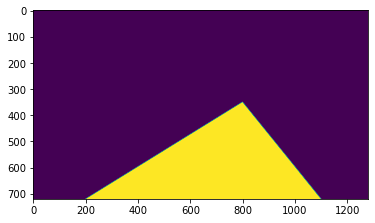

360 720 699 432
1103 720 775 432


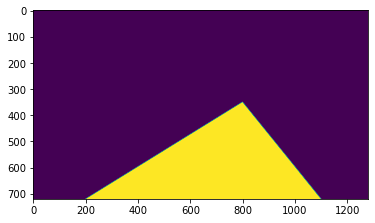

368 720 699 432
1057 720 767 432


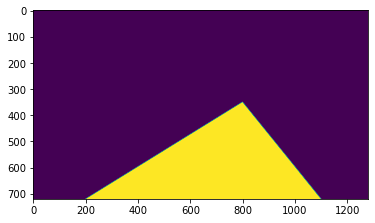

358 720 698 432
1099 720 773 432


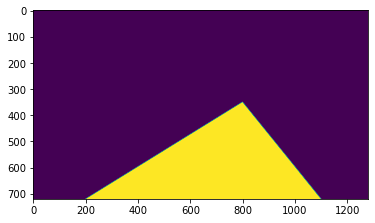

376 720 700 432
1107 720 778 432


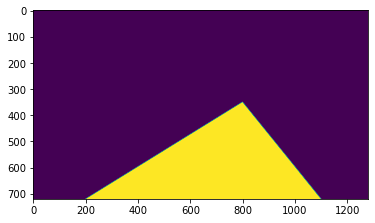

379 720 707 432
1119 720 783 432


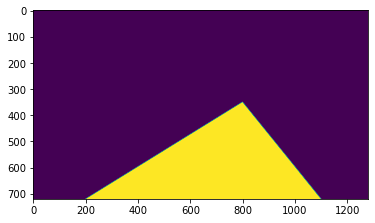

360 720 700 432
1107 720 782 432


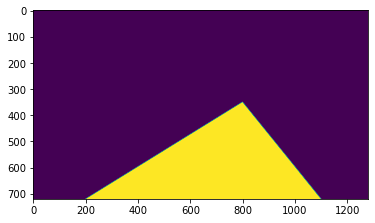

371 720 707 432
1024 720 771 432


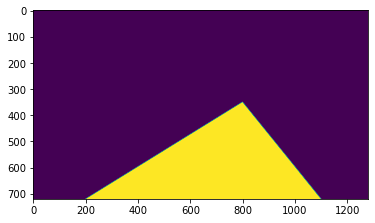

369 720 705 432
985 720 765 432


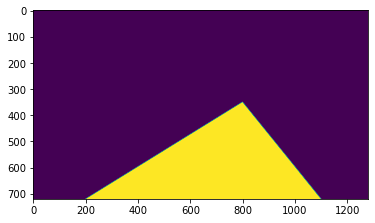

360 720 702 432
984 720 765 432


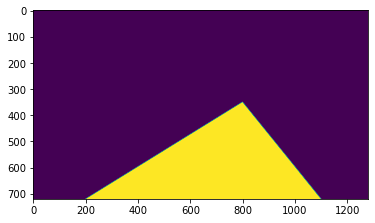

364 720 703 432
979 720 762 432


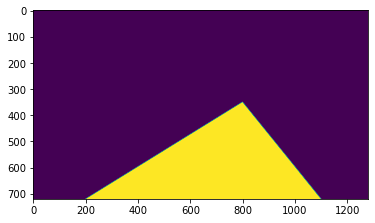

367 720 702 432
916 720 757 432


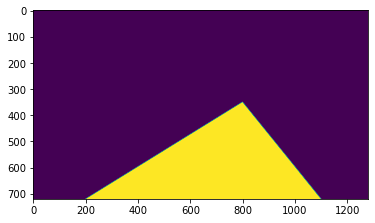

371 720 701 432
1127 720 779 432


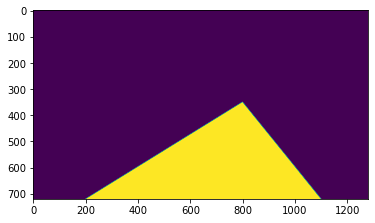

365 720 702 432
1116 720 781 432


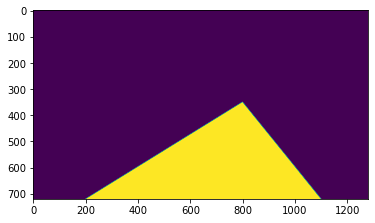

365 720 702 432
1125 720 783 432


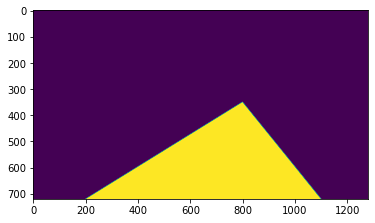

366 720 700 432
1118 720 785 432


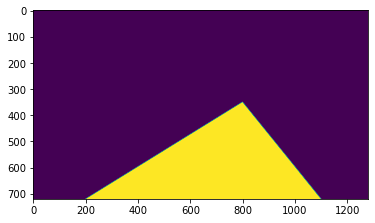

368 720 702 432
1126 720 783 432


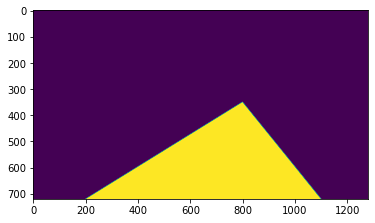

372 720 701 432
1120 720 785 432


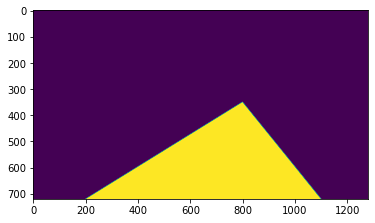

378 720 702 432
1120 720 781 432


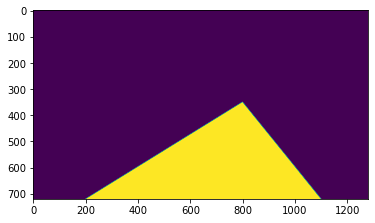

375 720 700 432
1113 720 777 432


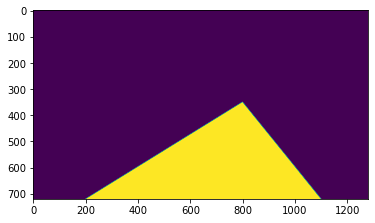

369 720 698 432
1121 720 779 432


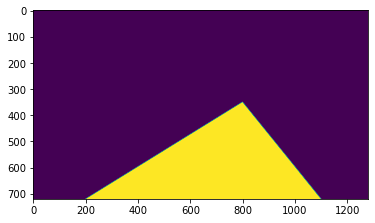

375 720 695 432
1118 720 775 432


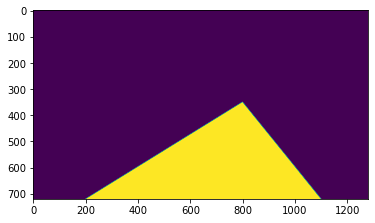

367 720 698 432
1117 720 779 432


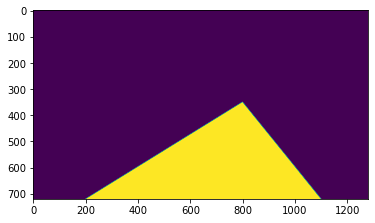

373 720 698 432
1121 720 780 432


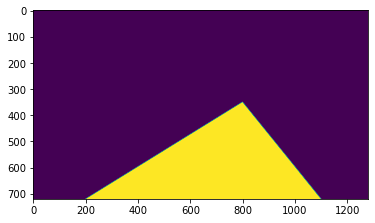

379 720 703 432
1122 720 779 432


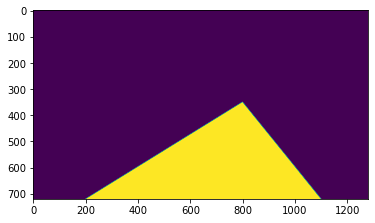

373 720 700 432
1111 720 774 432


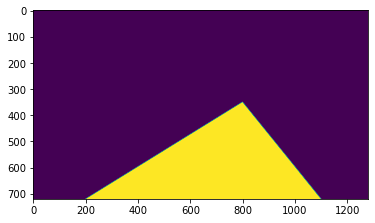

367 720 698 432
1110 720 771 432


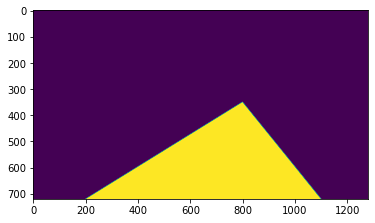

364 720 698 432
1107 720 770 432


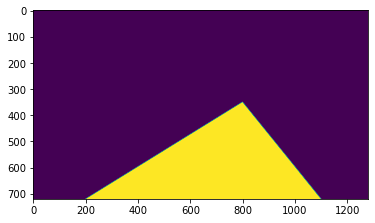

351 720 694 432
1104 720 766 432


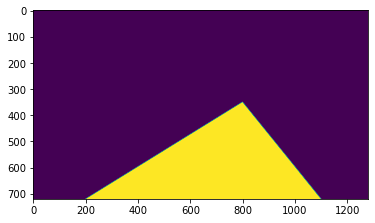

360 720 692 432
1103 720 765 432


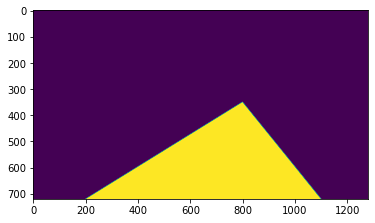

357 720 691 432
1103 720 764 432


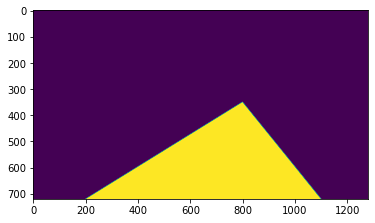

371 720 692 432
1103 720 768 432


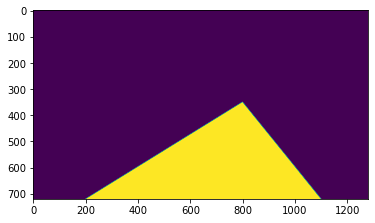

351 720 695 432
1097 720 768 432


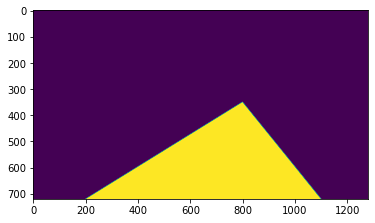

348 720 694 432
1095 720 770 432


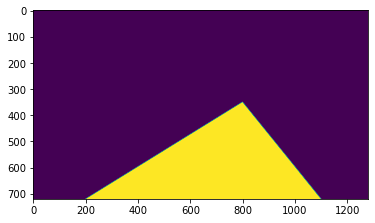

349 720 695 432
1098 720 768 432


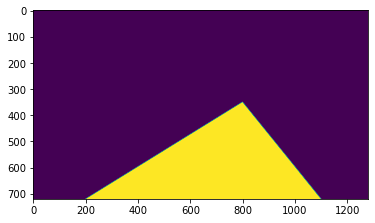

350 720 695 432
1091 720 772 432


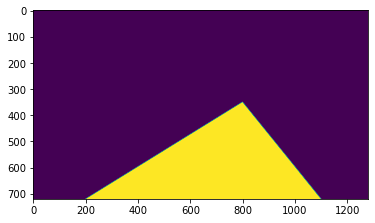

347 720 693 432
1093 720 767 432


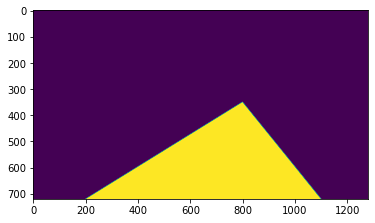

344 720 692 432
1098 720 767 432


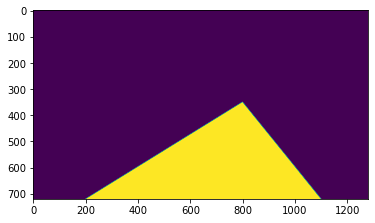

343 720 694 432
1088 720 768 432


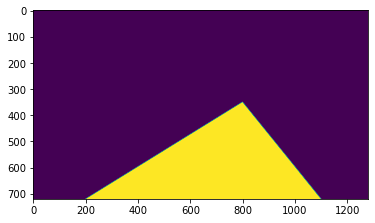

344 720 695 432
1088 720 768 432


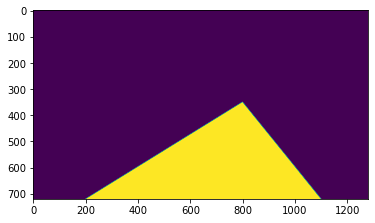

342 720 693 432
1087 720 768 432


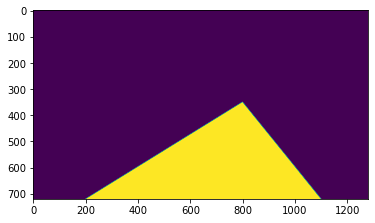

337 720 696 432
1083 720 769 432


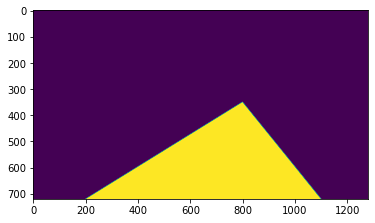

339 720 696 432
1088 720 767 432


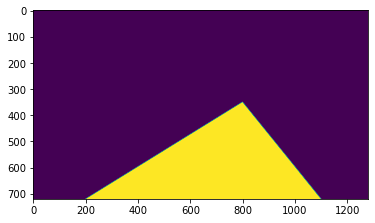

344 720 697 432
1084 720 767 432


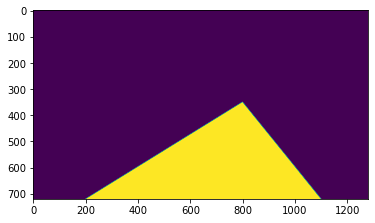

338 720 699 432
1091 720 767 432


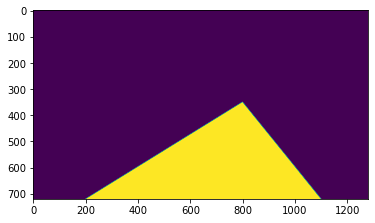

341 720 698 432
1077 720 769 432


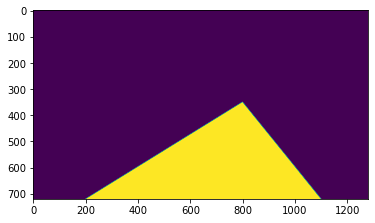

334 720 696 432
1083 720 767 432


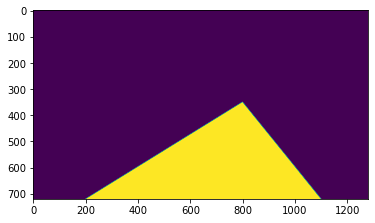

330 720 696 432
1080 720 763 432


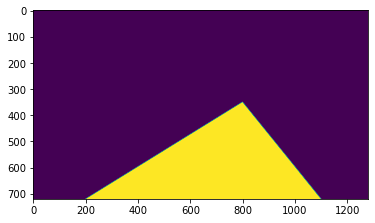

333 720 695 432
1071 720 765 432


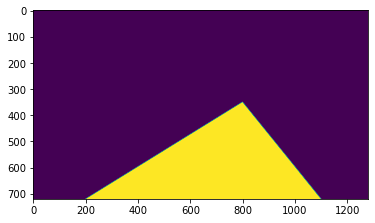

344 720 696 432
1073 720 770 432


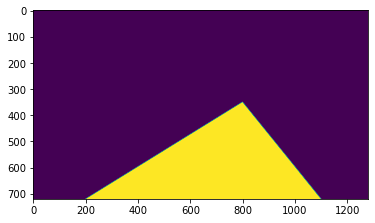

339 720 698 432
1077 720 771 432


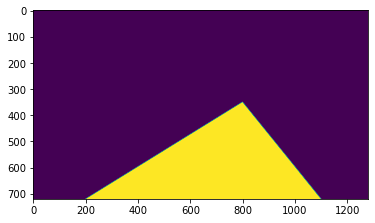

348 720 700 432
1071 720 772 432


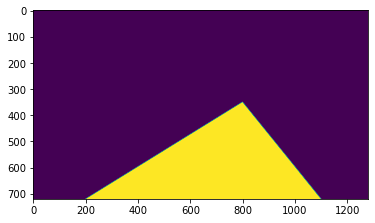

351 720 700 432
1074 720 772 432


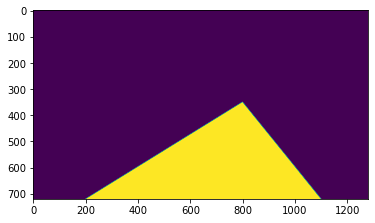

342 720 697 432
1071 720 769 432


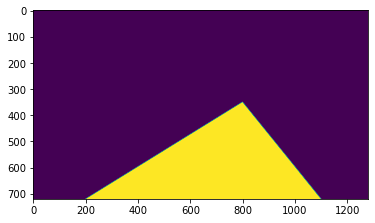

343 720 700 432
1081 720 771 432


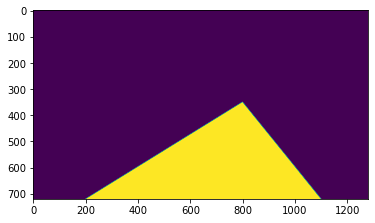

346 720 698 432
1069 720 770 432


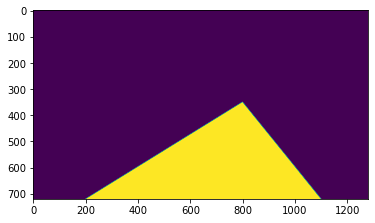

351 720 701 432
1073 720 770 432


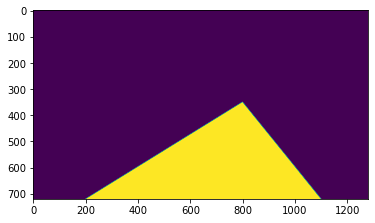

345 720 699 432
1076 720 771 432


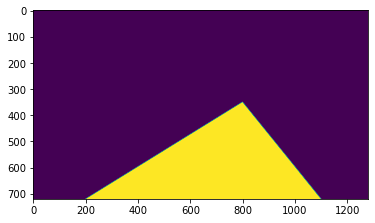

344 720 701 432
1082 720 772 432


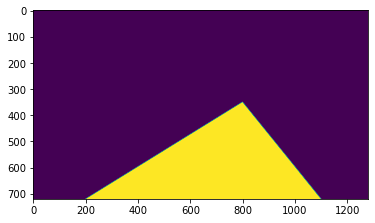

342 720 700 432
1074 720 773 432


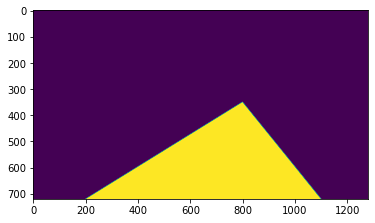

331 720 701 432
1080 720 773 432


In [26]:
capture = cv2.VideoCapture("test1.mp4")
while True:
    success,imgframe=capture.read()
    canny_op = canny(imgframe)
    masked_img = region_of_interest(canny_op)
    hough_L = houghLines(masked_img)
    avg_Lines = avg_slope_int(imgframe,hough_L)
    line_img =display_lines_average(imgframe,avg_Lines)#success variable is bool to tell true or false for read
    cv2.imshow("result",line_img)    
    if cv2.waitKey(1)& 0xFF ==ord('q'): #for terminating from video bu using 'q' key
        break

# Basic Camera Calibration

In [4]:
url ="https://github.com/misbah4064/lane_detection/raw/master/chess.png"
wget.download(url)

100% [..............................................................................] 19724 / 19724

'chess.png'

In [8]:
nx = 7
ny = 7
chimg = cv2.imread("chess.png")
grey = cv2.cvtColor(chimg,cv2.COLOR_BGR2GRAY)

ret, crns = cv2.findChessboardCorners(grey,(nx,ny),None)
if ret == True:
    cv2.drawChessboardCorners(chimg,(nx,ny),crns,ret)
        
cv2.imshow("result",chimg)
cv2.waitKey(0)

-1

# Main Camera Calibration

In [2]:
import glob

In [54]:
objpoints = []
imgpoints = []

images = glob.glob("{}/*".format("camera_cal"))

objp = np.zeros((9*6,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for image in images:
    img = cv2.imread(image)
    grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ret, crns = cv2.findChessboardCorners(grey,(9,6),None)
    if ret == True:
        imgpoints.append(crns)
        objpoints.append(objp)
    shape = (img.shape[1],img.shape[0])
    ret,mtx,dist, _,_ = cv2.calibrateCamera(objpoints,imgpoints,shape,None,None)
    
if not ret:
    raise Exception("Unable to calibrate camera")
    
def undistort(distorted_image):
    return cv2.undistort(distorted_image,mtx,dist,None,mtx)

In [56]:
imga = cv2.imread("camera_cal/calibration11.jpg")
output = undistort(imga)
cv2.imshow("undistorted",output)
cv2.waitKey(0)

-1

# Perspective Transform

In [58]:
url = "https://raw.githubusercontent.com/Dt-Pham/Advanced-Lane-Lines/master/test_images/straight_lines2.jpg"
wget.download(url)

100% [............................................................................] 193098 / 193098

'straight_lines2.jpg'

In [3]:
src = np.float32([(550, 460),
                (150, 720),     
                (1200, 720),    
                (770, 460)])
dst = np.float32([(100, 0),
                (100, 720),
                (1100, 720),
                (1100, 0)])
M = cv2.getPerspectiveTransform(src,dst)
M_inv = cv2.getPerspectiveTransform(dst,src)

def front_to_top(img):
    size = (1280,720)
    return cv2.warpPerspective(img,M,size,flags = cv2.INTER_LINEAR)

image = cv2.imread("straight_lines2.jpg")
output = front_to_top(image)

cv2.imshow("result",output)
cv2.waitKey(0)

-1